[nltk_data] Downloading package reuters to
[nltk_data]     /Users/viruzxero/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/viruzxero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



=== Skip-gram Analogy (queen - woman + man) ===
Word not found: "Key 'woman' not present in vocabulary"

=== CBOW Analogy (queen - woman + man) ===
Word not found: "Key 'woman' not present in vocabulary"

=== Skip-gram Similarity (king vs queen) ===
0.61866707

=== CBOW Similarity (king vs queen) ===
0.76208055


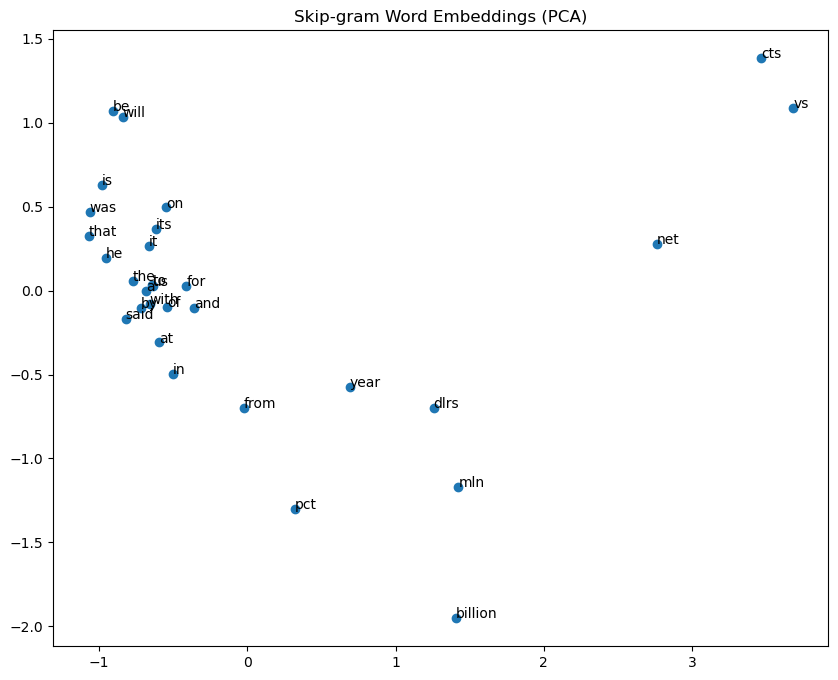

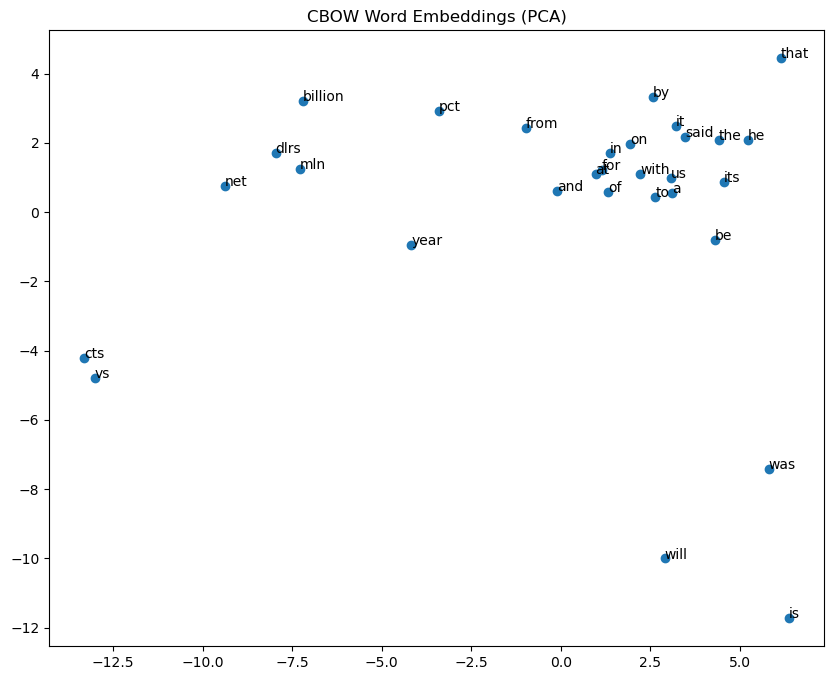

In [1]:
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import reuters
from collections import Counter
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# =====================
# 1. Load Reuters Corpus
# =====================
nltk.download('reuters')
nltk.download('punkt')

# Tokenize & lowercase
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return nltk.word_tokenize(text)

sentences = [preprocess(reuters.raw(fileid)) for fileid in reuters.fileids()]

# =====================
# 2. Train Word2Vec Models
# =====================
# Skip-gram (sg=1)
w2v_skipgram = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    sg=1,  # skip-gram
    min_count=2,
    workers=4
)

# CBOW (sg=0)
w2v_cbow = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    sg=0,  # cbow
    min_count=2,
    workers=4
)

# =====================
# 3. Evaluate Models
# =====================
def analogy(model, a, b, c, topn=5):
    try:
        result = model.wv.most_similar(positive=[a, c], negative=[b], topn=topn)
        return result
    except KeyError as e:
        return f"Word not found: {e}"

print("\n=== Skip-gram Analogy (queen - woman + man) ===")
print(analogy(w2v_skipgram, "queen", "woman", "man"))

print("\n=== CBOW Analogy (queen - woman + man) ===")
print(analogy(w2v_cbow, "queen", "woman", "man"))

print("\n=== Skip-gram Similarity (king vs queen) ===")
print(w2v_skipgram.wv.similarity("king", "queen"))

print("\n=== CBOW Similarity (king vs queen) ===")
print(w2v_cbow.wv.similarity("king", "queen"))

# =====================
# 4. PCA Plot for 30 Most Frequent Words
# =====================
# Flatten sentences and count words
word_counts = Counter([word for sent in sentences for word in sent])
top_words = [word for word, _ in word_counts.most_common(30) if word in w2v_skipgram.wv]

def plot_embeddings(model, words, title):
    X = [model.wv[word] for word in words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title(title)
    plt.show()

# Plot Skip-gram
plot_embeddings(w2v_skipgram, top_words, "Skip-gram Word Embeddings (PCA)")

# Plot CBOW
plot_embeddings(w2v_cbow, top_words, "CBOW Word Embeddings (PCA)")
